# Wisconsin Diagnostic Breast Cancer

Nosso objetivo aqui é treinar sete modelos usando o mesmo dataset e calcular a acurácia destes.

Primeiramente, vamos carregar o nosso dataset e separá-lo em partes de 70%/30% para treino e teste.

Também iremos mapear os valores de saída de [0, 1] para [-1, 1], visto que os nossos modelos foram feitos para retornar esses valores.

Após isso, iremos treinar cada um dos modelos e comparar os resultados:

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1))

(trainData, trainLabels) = load_breast_cancer(return_X_y=True, as_frame=True)
trainLabels = trainLabels.replace(0, -1).astype(np.float64)
trainData[:] = scaler.fit_transform(trainData)

(trainData, testData, trainLabels, testLabels) = train_test_split(trainData, trainLabels, test_size=0.3, random_state=42)

trData, tData, trLabels, tLabels = map(lambda x: x.to_numpy(), (trainData, testData, trainLabels, testLabels))

display(trainData.head(4), trainLabels.head(4))
display(trData[:4, :4], trLabels[:4])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,-0.360216,-0.445384,-0.387326,-0.625451,-0.515934,-0.727747,-0.864995,-0.867893,-0.582828,-0.754002,...,-0.472785,-0.443497,-0.534041,-0.734221,-0.657399,-0.699023,-0.750160,-0.586323,-0.690518,-0.801915
124,-0.395239,-0.548191,-0.415244,-0.652174,-0.665613,-0.669529,-0.620806,-0.721670,-0.634343,-0.651643,...,-0.549626,-0.428038,-0.585836,-0.780328,-0.586211,-0.561836,-0.471565,-0.382955,-0.809580,-0.721370
421,-0.270292,-0.711194,-0.247737,-0.565133,-0.088742,0.007423,-0.320525,-0.373757,0.036364,0.015164,...,-0.393099,-0.663113,-0.365606,-0.693276,-0.207158,-0.347615,-0.485783,-0.238488,-0.502464,-0.514102
195,-0.438781,-0.552249,-0.464584,-0.683648,-0.516476,-0.789706,-0.818510,-0.763718,-0.223232,-0.717355,...,-0.576663,-0.468017,-0.597590,-0.795812,-0.491118,-0.760728,-0.718211,-0.434021,-0.424798,-0.810442


149    1.0
124    1.0
421    1.0
195    1.0
Name: target, dtype: float64

array([[-0.36021582, -0.44538383, -0.38732638, -0.62545069],
       [-0.39523877, -0.54819073, -0.41524428, -0.65217391],
       [-0.27029202, -0.71119378, -0.24773685, -0.56513256],
       [-0.43878082, -0.5522489 , -0.46458434, -0.68364793]])

array([1., 1., 1., 1.])

## Preparação e treino de modelos

Primeiramente, vamos criar uma função auxiliar para treinar os modelos para vários números de iterações diferentes:

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score


def train_model(model_name, model_generator, scores, fit_func=None):
    if fit_func == None:
        def fit_func(m, d, l):
            return m.fit(d, l)

    for k in range(1, 100):
        model = model_generator(k)
        fit_func(model, trData, trLabels)
        
        pred = model.predict(tData)
        score = accuracy_score(tLabels, pred)
        scores.loc[model_name, k] = score
        preds[(model_name, k)] = pred


scores = pd.DataFrame()
preds = {}

### Treinando nossos modelos

In [8]:
from perceptron import Perceptron
from adaline_gd import AdalineGD
from adaline_sgd import AdalineSGD

train_model(
    'Perceptron',
    lambda k: Perceptron(eta=0.01, n_iter=k, random_state=42),
    scores
)

train_model(
    'Adaline GD',
    lambda k: AdalineGD(eta=0.0001, n_iter=k, random_state=42),
    scores
)

train_model(
    'Adaline SGD',
    lambda k: AdalineSGD(eta=0.01, n_iter=k, random_state=42),
    scores
)

train_model(
    'Adaline SGD Mini-Batch',
    lambda k: AdalineSGD(eta=0.01, n_iter=k, random_state=42),
    scores,
    fit_func=lambda m, d, l: m.batch_fit(d, l, 20)
)


### Treinando modelos do SKLearn

In [9]:
from sklearn.linear_model import Perceptron as SKPerceptron, SGDClassifier, LogisticRegression

train_model(
    'SKLearn Perceptron',
    lambda k: SKPerceptron(eta0=0.01, max_iter=k, random_state=42),
    scores
)

train_model(
    'SKLearn SGDClassifier',
    lambda k: SGDClassifier(eta0=0.01, max_iter=k, random_state=42),
    scores
)

train_model(
    'SKLearn LogisticRegression',
    lambda k: LogisticRegression(max_iter=k, random_state=42),
    scores
)


c:\Users\Gabriel Maia Gondim\Desktop\Projects\ML2023-GabrielMaiaGondim\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Gabriel Maia Gondim\Desktop\Projects\ML2023-GabrielMaiaGondim\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Gabriel Maia Gondim\Desktop\Projects\ML2023-GabrielMaiaGondim\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Gabriel Maia Gondim\Desktop\Projects\ML2023-GabrielMaiaGondim\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702

## Analisando resultados

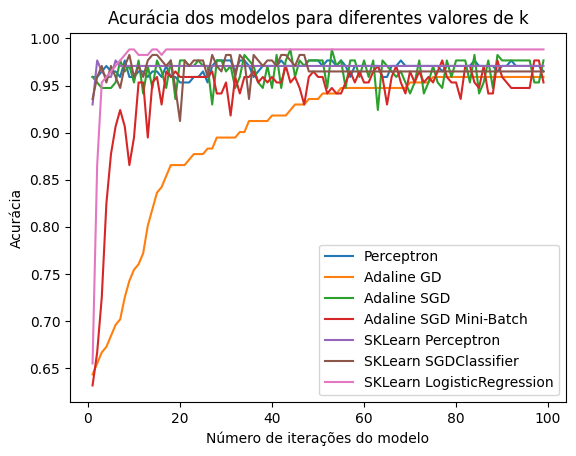

In [10]:
from matplotlib import pyplot as plt

# df = sheet.groupby('ANO ESTATISTICA')['ANO ESTATISTICA'].count()
scores.T.plot(title="Acurácia dos modelos para diferentes valores de k",
        xlabel="Número de iterações do modelo", ylabel="Acurácia")
plt.show()


Como podemos ver, para esse problema, os perceptrons e o Adaline SGD
foram os que convergiram mais rápido e o LogisticRegression foi o que
obteve a melhor acurácia no longo prazo.

Podemos perceber também uma maior instabilidade nos modelos estocásticos, como é esperado.